In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))

Descriptive Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


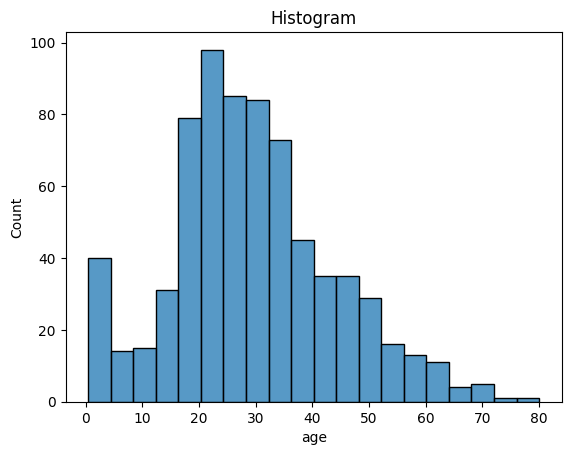

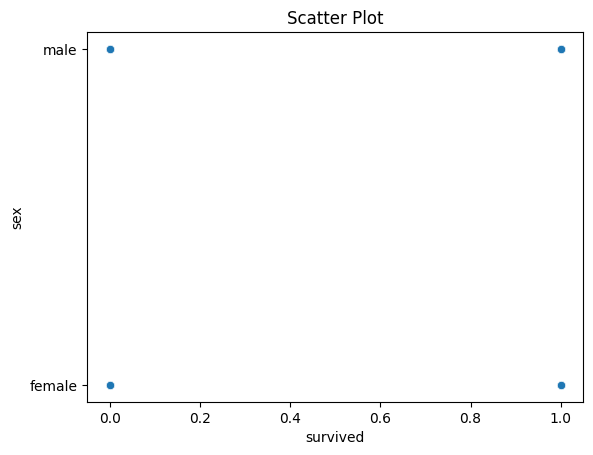

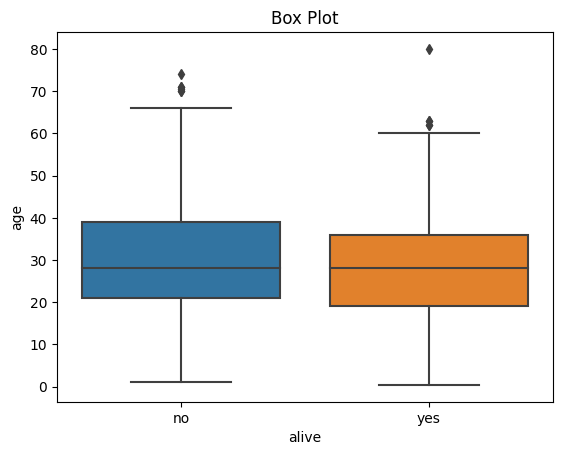

<ipython-input-6-ba61db2c68c4>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


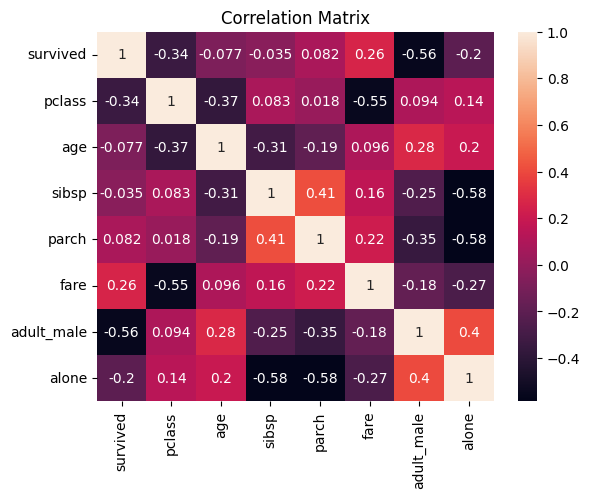

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


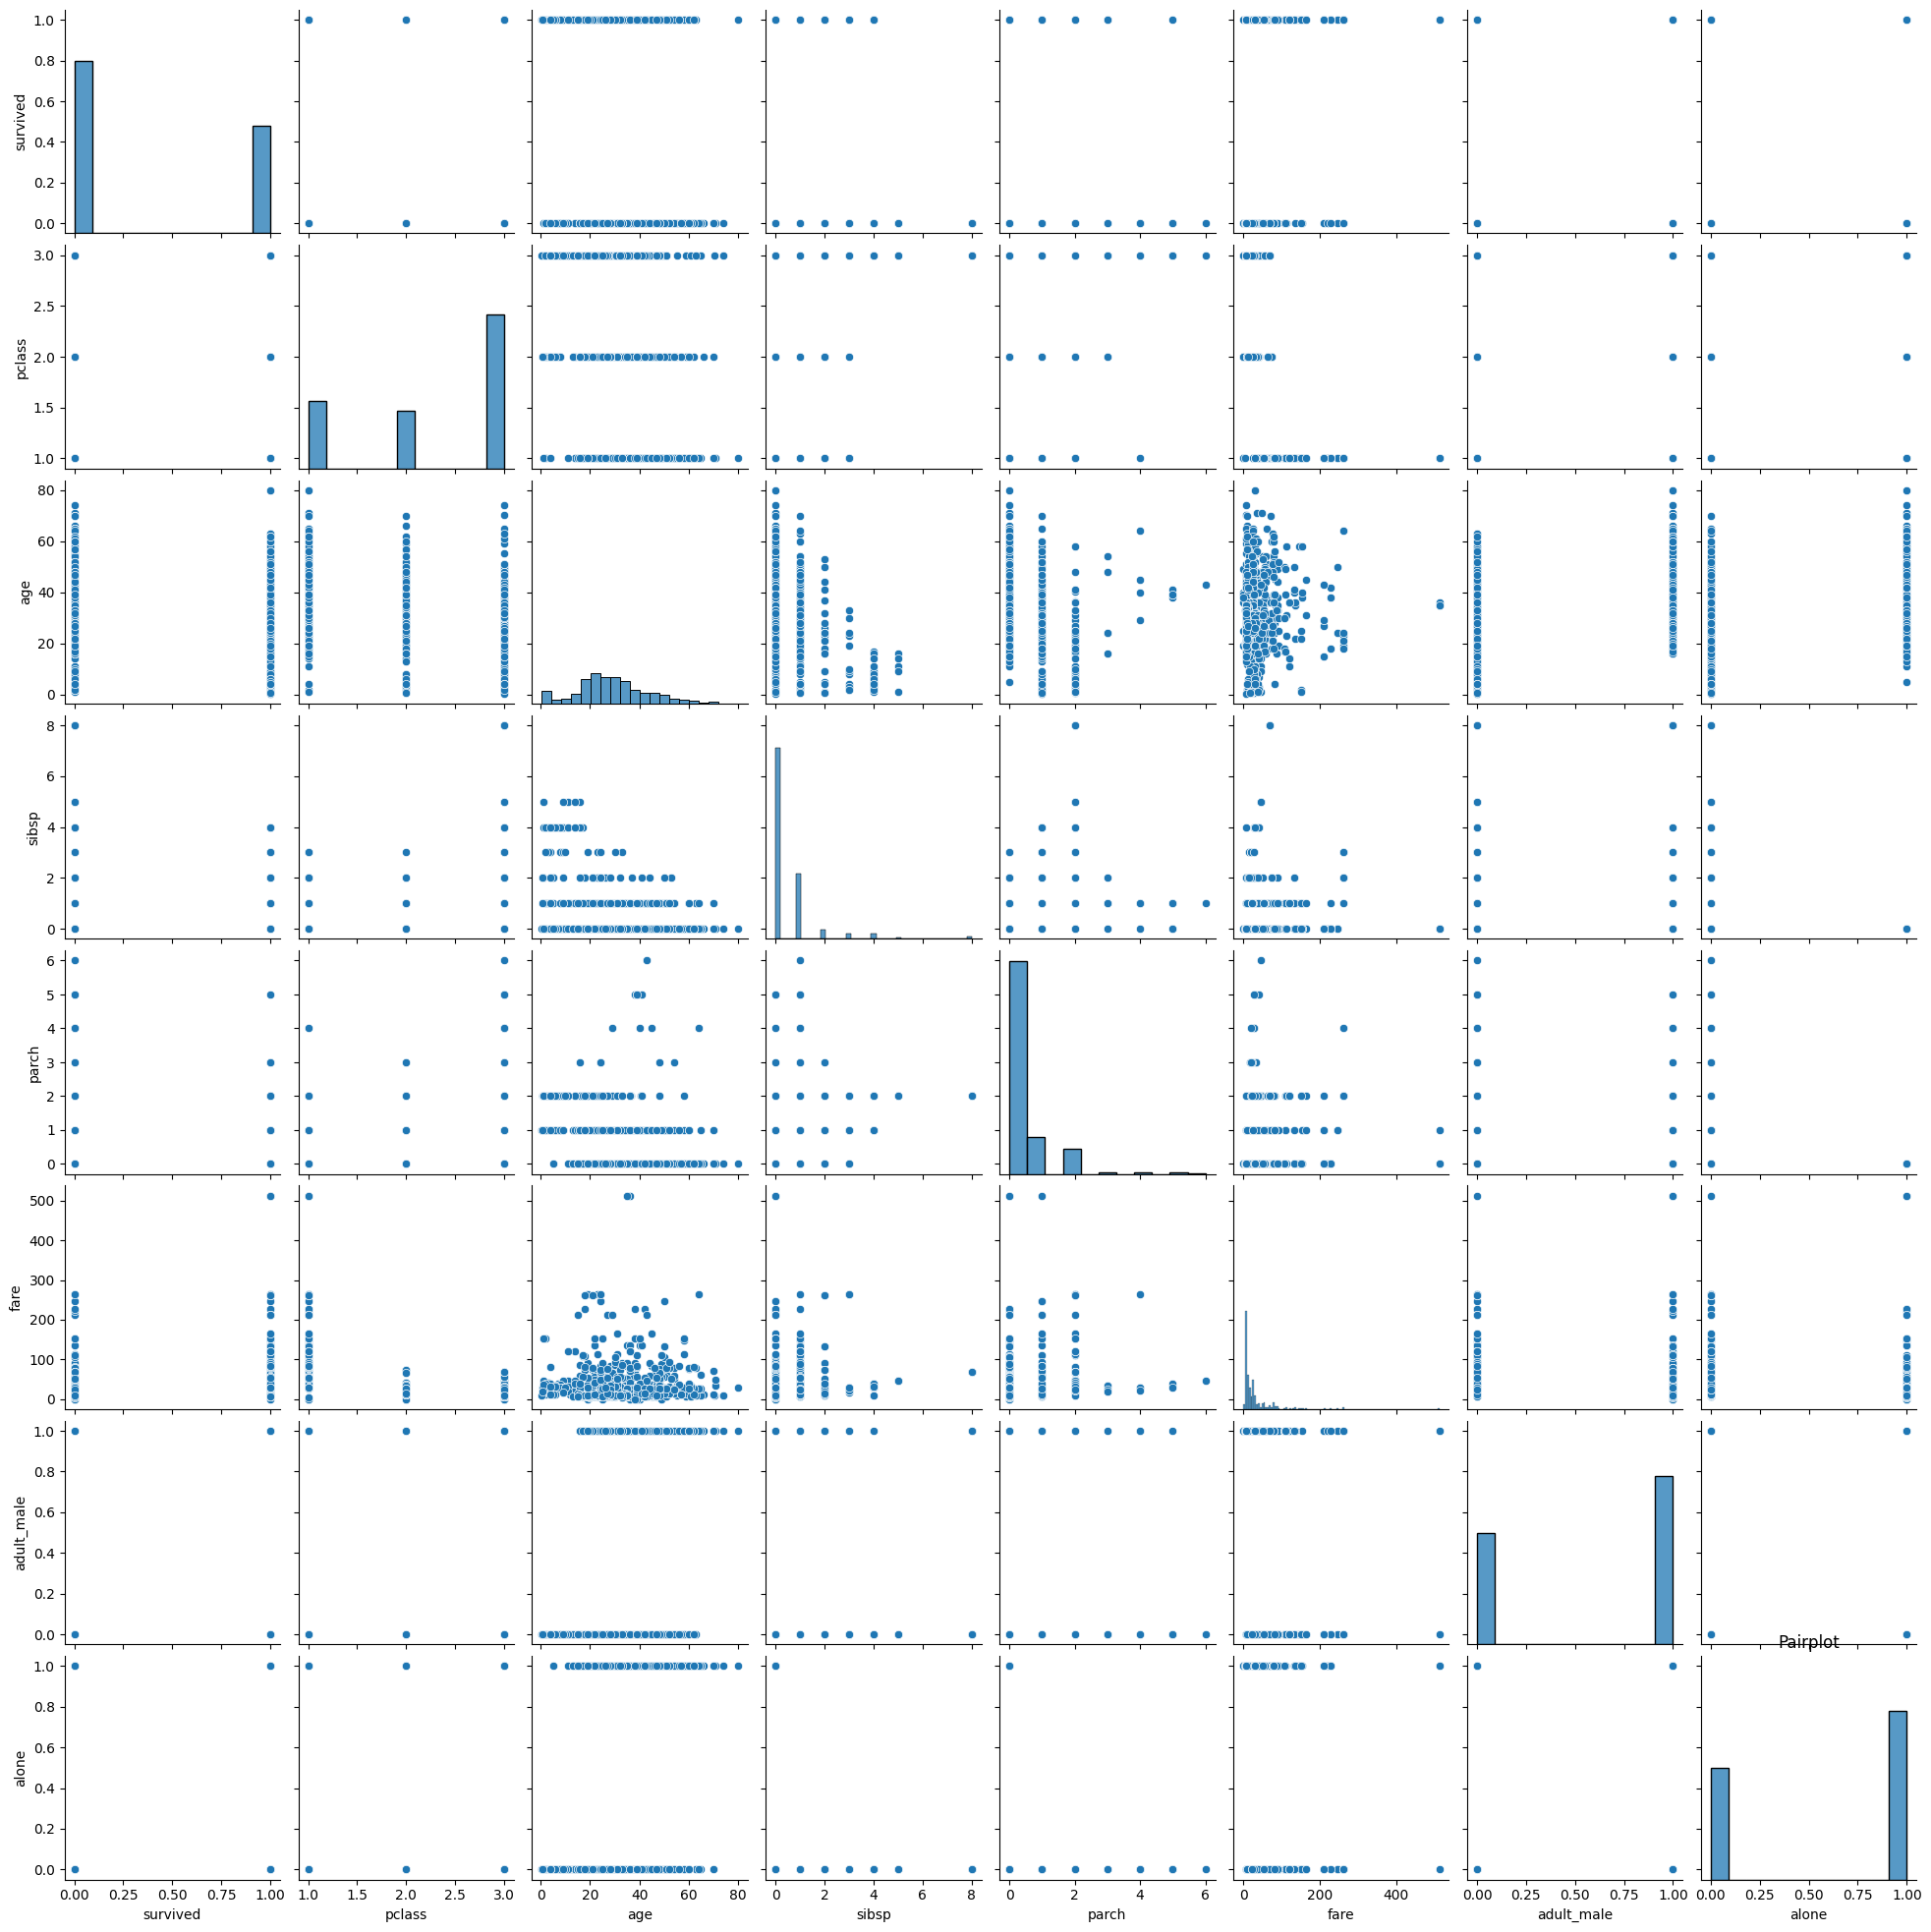

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
data = pd.read_csv('titanic.csv')

# Univariate Analysis
# Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

# Histogram
sns.histplot(data['age'])
plt.title('Histogram')
plt.show()

# Bivariate Analysis
# Scatter plot
sns.scatterplot(data=data, x='survived', y='sex')
plt.title('Scatter Plot')
plt.show()

# Box plot
sns.boxplot(data=data, x='alive', y='age')
plt.title('Box Plot')
plt.show()

# Multivariate Analysis
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(data)
plt.title('Pairplot')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('titanic.csv')

# Descriptive statistics
print("Descriptive Statistics:")
print(data.describe())


Descriptive Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('titanic.csv')

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Drop rows with missing values
data_without_missing = data.dropna()

# Fill missing values with a specified value
filled_data = data.fillna(value=0)

# Fill missing values with the mean of the column
mean_filled_data = data.fillna(data.mean())

# Fill missing values with the median of the column
median_filled_data = data.fillna(data.median())


Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<ipython-input-8-6c3796dbc00a>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_filled_data = data.fillna(data.mean())
<ipython-input-8-6c3796dbc00a>:20: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_filled_data = data.fillna(data.median())


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('titanic.csv')

# Find outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Replace outliers with median using IQR method
def replace_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound),
                            data[column].median(), data[column])
    return data

# Find outliers in a specific column
outliers = find_outliers_iqr(data, 'fare')
print("Outliers:")
print(outliers)

# Replace outliers in a specific column
data = replace_outliers_iqr(data, 'fare')


Outliers:
     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
31          1       1  female   NaN      1      0  146.5208        C  First   
34          0       1    male  28.0      1      0   82.1708        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
846         0       3    male   NaN      8      2   69.5500        S  Third   
849         1       1  female   NaN      1      0   89.1042        C  First   
856         1       1  female  45.0      1      1  164.8667        S  First   
863         0       3  female   NaN      8      2   69.5500        S  Third   
879         1       1  female  56.0      0      1   83.1583        C  First   

       who  adult_male deck  embark_town 

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('titanic.csv')

# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

# Perform one-hot encoding
one_hot_encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Perform label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoded_data = data.copy()

for column in categorical_columns:
    label_encoded_data[column] = label_encoder.fit_transform(label_encoded_data[column])

# Display encoded values
print("One-Hot Encoded Data:")
print(one_hot_encoded_data.head())

print("\nLabel Encoded Data:")
print(label_encoded_data.head())

Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
One-Hot Encoded Data:
   survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0         0       3  22.0      1      0   7.2500        True  False   
1         1       1  38.0      1      0  71.2833       False  False   
2         1       3  26.0      0      0   7.9250       False   True   
3         1       1  35.0      1      0  53.1000       False  False   
4         0       3  35.0      0      0   8.0500        True   True   

   sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
0           0         1  ...       0       0       0       0       0   
1           1         0  ...       1       0       0       0       0   
2           1         0  ...       0       0       0       0       0   
3           1         0  ...       1       0       0       0       0   
4           0         1  ...       0       0       0       0       0   

   emb

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('titanic.csv')

# Split into independent and dependent variables
X = data.drop('adult_male', axis=1)  # Independent variables
y = data['adult_male']  # Dependent variable

# Display the independent variables
print("Independent Variables:")
print(X.head())

# Display the dependent variable
print("\nDependent Variable:")
print(y.head())


Independent Variables:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who deck  embark_town alive  alone  
0    man  NaN  Southampton    no  False  
1  woman    C    Cherbourg   yes  False  
2  woman  NaN  Southampton   yes   True  
3  woman    C  Southampton   yes  False  
4    man  NaN  Southampton    no   True  

Dependent Variable:
0     True
1    False
2    False
3    False
4     True
Name: adult_male, dtype: bool


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('titanic.csv')

# Split into independent and dependent variables
X = data.drop('adult_male', axis=1)  # Independent variables
y = data['adult_male']  # Dependent variable

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled independent variables
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled independent variables
print("Scaled Independent Variables:")
print(X_scaled_df.head())


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data = pd.read_csv('titanic.csv')

# Split into independent and dependent variables
X = data.drop('adult_male', axis=1)  # Independent variables
y = data['adult_male']  # Dependent variable

# Convert categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Create a new DataFrame with scaled independent variables
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Display the scaled independent variables
print("Scaled Independent Variables:")
print(X_scaled_df.head())


Scaled Independent Variables:
   survived    pclass       age     sibsp     parch      fare     alone  \
0 -0.789272  0.827377 -0.530377  0.432793 -0.473674 -0.502445 -1.231645   
1  1.266990 -1.566107  0.571831  0.432793 -0.473674  0.786845 -1.231645   
2  1.266990  0.827377 -0.254825 -0.474545 -0.473674 -0.488854  0.811922   
3  1.266990 -1.566107  0.365167  0.432793 -0.473674  0.420730 -1.231645   
4 -0.789272  0.827377  0.365167 -0.474545 -0.473674 -0.486337  0.811922   

   sex_female  sex_male  embarked_C  ...    deck_C    deck_D    deck_E  \
0   -0.737695  0.737695   -0.482043  ... -0.266296 -0.196116 -0.193009   
1    1.355574 -1.355574    2.074505  ...  3.755222 -0.196116 -0.193009   
2    1.355574 -1.355574   -0.482043  ... -0.266296 -0.196116 -0.193009   
3    1.355574 -1.355574   -0.482043  ...  3.755222 -0.196116 -0.193009   
4   -0.737695  0.737695   -0.482043  ... -0.266296 -0.196116 -0.193009   

     deck_F    deck_G  embark_town_Cherbourg  embark_town_Queenstown  \
0 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('titanic.csv')

# Split into independent and dependent variables
X = data.drop('adult_male', axis=1)  # Independent variables
y = data['adult_male']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Set - X shape:", X_train.shape)
print("Training Set - y shape:", y_train.shape)
print("Testing Set - X shape:", X_test.shape)
print("Testing Set - y shape:", y_test.shape)


Training Set - X shape: (712, 14)
Training Set - y shape: (712,)
Testing Set - X shape: (179, 14)
Testing Set - y shape: (179,)
